**Цель исследования** - проанализировать данные о пользователях сервиса аренды самокатов GoFast.\
Необходимо проверить следующие гипотезы:
1.  Тратят ли пользователи с подпиской больше времени на поездки?\
2.  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Также требуется с помощью распределений решить следующие задачи:
1. нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%

2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Описание данных В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

user_id - уникальный идентификатор пользователя
name - имя пользователя
age - возраст
city - город
subscription_type тип подписки (free, ultra)\

Поездки — rides_go.csv\

user_id - уникальный идентификатор пользователя distance - расстояние, которое пользователь проехал в текущей сессии (в метрах) duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки\

Подписки — subscriptions_go.csv
subscription_type - тип подписки
minute_price - стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee - стоимость ежемесячного платежа\

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from math import factorial, sqrt


# Загрузка данных

In [2]:
users_go = pd.read_csv('C:/Users/Иван/test/6Sprint/users_go.csv')
rides_go = pd.read_csv('C:/Users/Иван/test/6Sprint/rides_go.csv')
subscriptions_go = pd.read_csv('C:/Users/Иван/test/6Sprint/subscriptions_go.csv')
pd.set_option('display.max_columns', None)

In [3]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users_go.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Всего датасет users_go содержит данные о 1534 пользователях из разных городов. Датасет rides_go содержит в себе 18068 записей о поездках пользователей из датасета users_go. Датасет subscription_go содержит данные о тарифах поездок с подпиской и без.

# Предобработка данных

## Обработка users_go

In [8]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

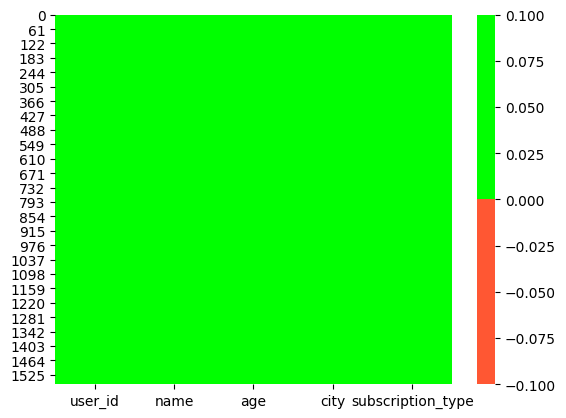

In [9]:
cols = users_go.columns 

#красный для пропущенных данных и зеленый для не пропущенных
colours = ['#FF5733', '#00FF00']
sns.heatmap(users_go[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [10]:
users_go.duplicated().sum()

31

In [11]:
users_go.shape

(1565, 5)

In [12]:
users_go.drop_duplicates(inplace=True)

In [13]:
users_go.duplicated().sum()

0

<Axes: >

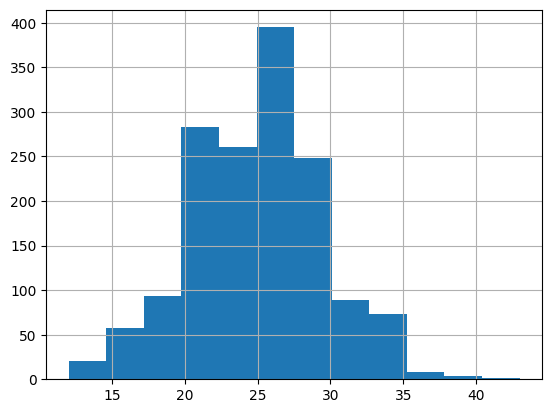

In [14]:
users_go['age'].hist(bins=12)

В датасете users_go обработаны дубликаты. Аномальные выбросы и пропущенные значения отсутсвуют.

## Обработка rides_go

In [15]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
dtype: int64

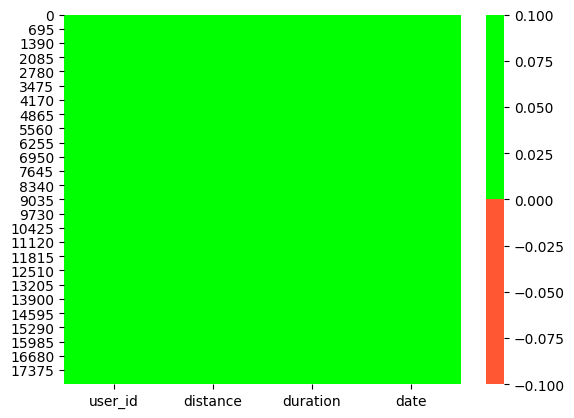

In [16]:
cols = rides_go.columns 

#красный для пропущенных данных и зеленый для не пропущенных
colours = ['#FF5733', '#00FF00']
sns.heatmap(rides_go[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

In [17]:
rides_go.duplicated().sum()

0

array([[<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'duration'}>]], dtype=object)

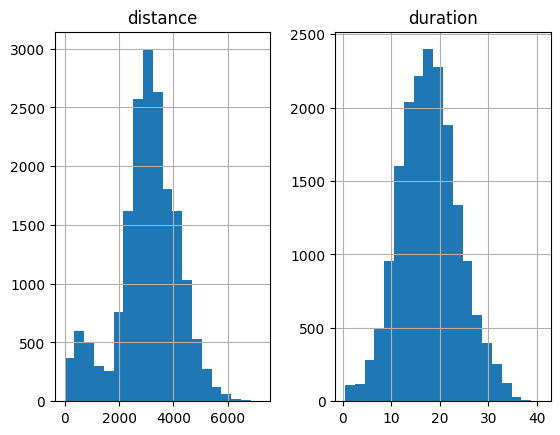

In [18]:
rides_go[['distance', 'duration']].hist(bins=20)

In [19]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [20]:
rides_go['date'] = pd.to_datetime(rides_go['date'])

In [21]:
rides_go.dtypes

user_id              int64
distance           float64
duration           float64
date        datetime64[ns]
dtype: object

In [22]:
rides_go.corr()

C:\Users\Иван\AppData\Local\Temp\ipykernel_13780\544470720.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rides_go.corr()


,user_id,distance,duration
user_id,1.000000,-0.031249,-0.079940
distance,-0.031249,1.000000,0.536778
duration,-0.079940,0.536778,1.000000


In [23]:
rides_go['distance'] = rides_go['distance'].round(2)
rides_go['duration'] = np.ceil(rides_go['duration']) 
rides_go['duration'] = rides_go['duration'].astype('int')

In [24]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.92,26,2021-01-01
1,1,2617.59,16,2021-01-18
2,1,754.16,7,2021-04-20
3,1,2694.78,19,2021-08-11
4,1,4028.69,27,2021-08-28
5,1,2770.89,17,2021-10-09
6,1,3039.02,15,2021-10-19
7,1,2842.12,24,2021-11-06
8,1,3412.69,16,2021-11-14
9,1,748.69,16,2021-11-22


На этапе предобработки данных были обработаны дубликаты в данных, изучены датасеты на предмет пропусков данных, которых не оказалось ни в одном датасете. Также были построены гистограмы для числовых признаков.

# Исследовательский анализ данных


## Частота встречаемости городов


In [25]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [26]:
users_go.city.unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

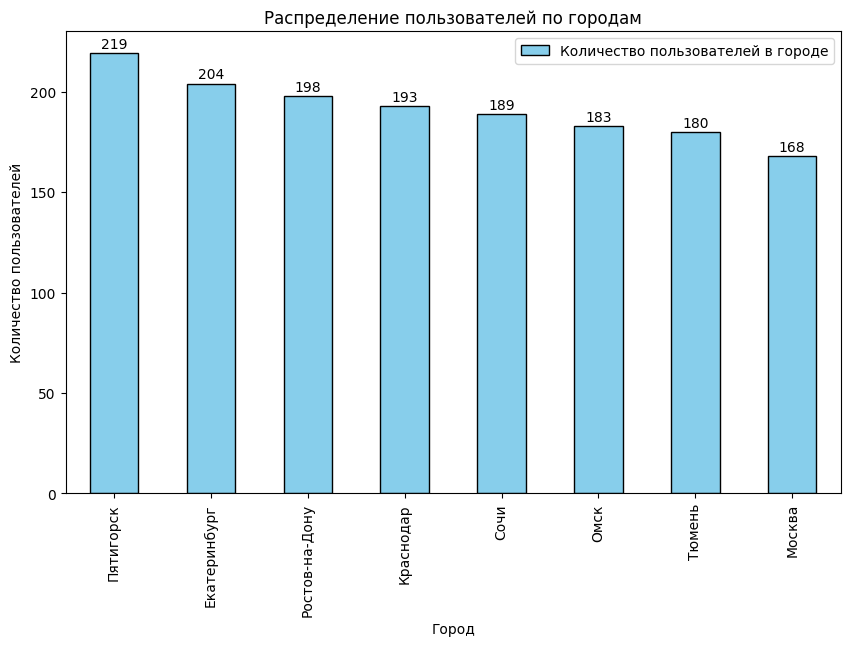

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

user_counts = users_go['city'].value_counts()
user_counts.plot(kind='bar',ax=ax,color ='skyblue', edgecolor='black')

for i, v in enumerate(user_counts):
    ax.text(i, v + 1 , str(v), ha='center', va='bottom', fontsize=10)

plt.title('Распределение пользователей по городам')
plt.xlabel('Город')
plt.ylabel('Количество пользователей')
ax.legend(['Количество пользователей в городе'])
plt.show()

Самый популярный город - Пятигорск, наименее - Москва.


## Cоотношение пользователей с подпиской и без подписки

Text(0.5, 1.0, 'Тип подписки')

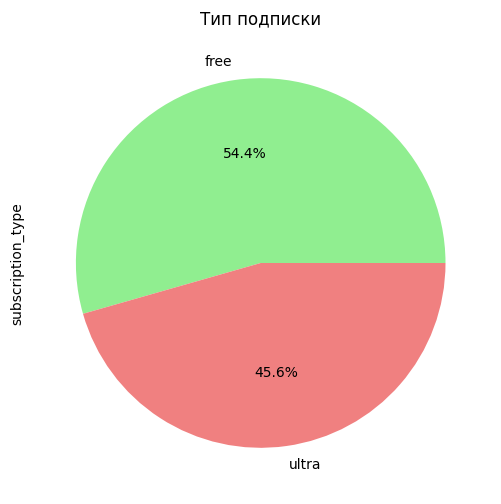

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))

subs_type_perc = (users_go['subscription_type'].value_counts() / users_go.shape[0]) * 100
# subs_type_perc.plot(kind='pie', ax=ax)

colors=['lightgreen', 'lightcoral']

subs_type_perc.plot(kind='pie', ax=ax, autopct='%1.1f%%', colors=colors)
plt.title('Тип подписки')



Как можно заметить пользователей без подписки в процентном соотношении больше(54.4%), чем пользователей с подпиской (45.6%)

## Возраст пользователей

In [29]:
users_go.age.describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

<Axes: >

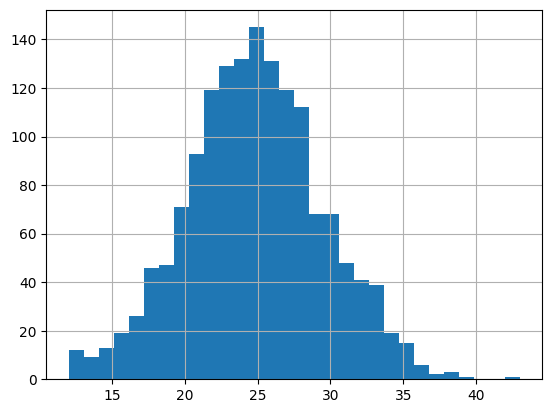

In [30]:
users_go['age'].hist(bins=30)

Средний возраст пользователя - 25 лет, минимальный - 12, а максимальный - 43 года.

## Продолжительность поездок

In [31]:
rides_go.head()

,user_id,distance,duration,date
0,1,4409.92,26,2021-01-01
1,1,2617.59,16,2021-01-18
2,1,754.16,7,2021-04-20
3,1,2694.78,19,2021-08-11
4,1,4028.69,27,2021-08-28


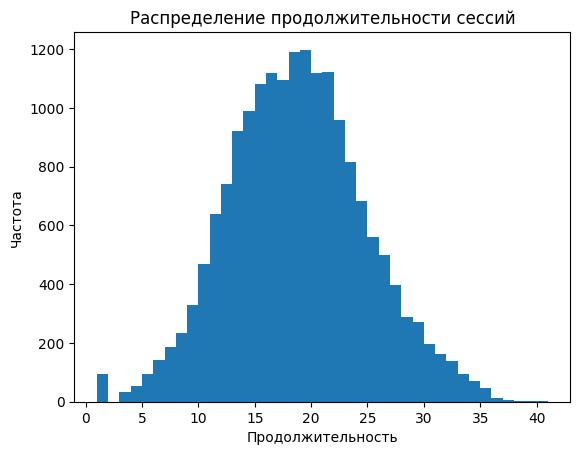

In [32]:
plt.hist(rides_go['duration'], bins=40)
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение продолжительности сессий')
plt.show()

In [33]:
rides_go.duration.describe()

count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

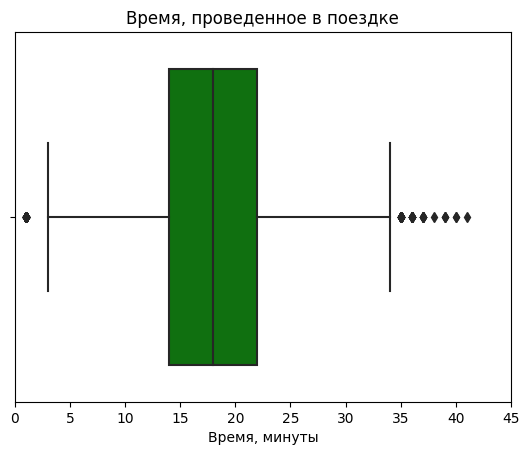

In [34]:
sns.boxplot(x = rides_go['duration'], color='green')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 45)

In [35]:
rides_go.duration.median()

18.0

Средняя продолжительность поездки среди пользователей 17.6 минут. При это присутсвуют долгие сессии от 30 минут и выше, так и слишком короткие сессии продолжительностью меньше минуты.

## Расстояние, которое пользователь преодолел за одну поездку;

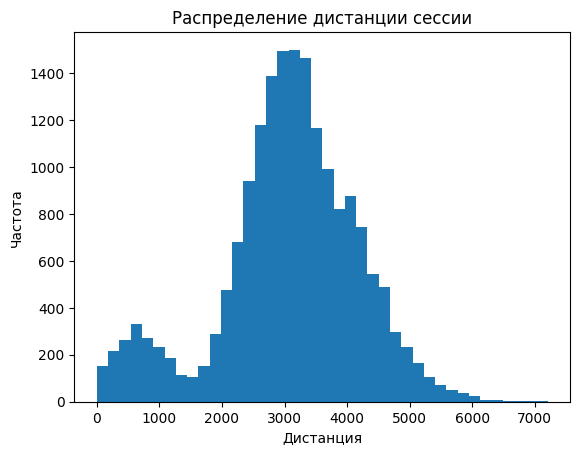

In [36]:
# rides_go.distance.hist(bins=30, figsize=(5,5))
plt.hist(rides_go['distance'], bins=40)
plt.xlabel('Дистанция')
plt.ylabel('Частота')
plt.title('Распределение дистанции сессии')
plt.show()

In [37]:
rides_go.distance.describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

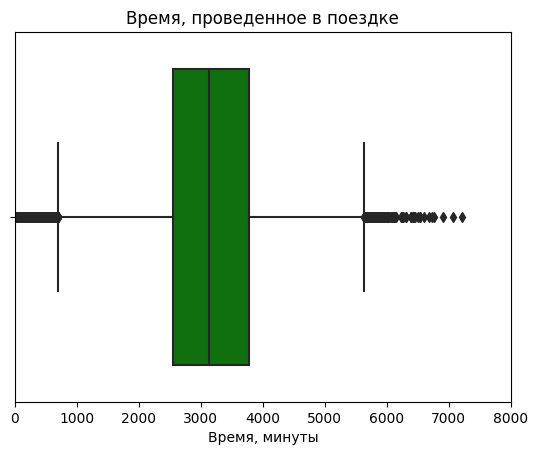

In [38]:
sns.boxplot(x = rides_go['distance'], color='green')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время, минуты')
_ = plt.xlim(0, 8000)

Средняя дистанция поездки - 3070 метров. При этом существуют как слишком "длинные" поездки до 7000 метров, так и слишком короткие длиною меньше 1000 метров.


# Объединение данных

## Объединение датафреймов

In [39]:
merged_data = users_go.merge(rides_go, on='user_id')
merged_data.head(20)

,user_id,name,age,city,subscription_type,distance,duration,date
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28
5,1,Кира,22,Тюмень,ultra,2770.89,17,2021-10-09
6,1,Кира,22,Тюмень,ultra,3039.02,15,2021-10-19
7,1,Кира,22,Тюмень,ultra,2842.12,24,2021-11-06
8,1,Кира,22,Тюмень,ultra,3412.69,16,2021-11-14
9,1,Кира,22,Тюмень,ultra,748.69,16,2021-11-22


In [40]:
merged_data.shape

(18068, 8)

In [41]:
merged_data = merged_data.merge(subscriptions_go, on='subscription_type')
merged_data.head(30)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17,2021-10-09,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15,2021-10-19,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24,2021-11-06,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16,2021-11-14,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16,2021-11-22,6,0,199


## Фильтрация датафреймов для пользователей с подпиской и без

In [42]:
ultra_subs_type = merged_data[merged_data['subscription_type'] == 'ultra']
ultra_subs_type.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17,2021-10-09,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15,2021-10-19,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24,2021-11-06,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16,2021-11-14,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16,2021-11-22,6,0,199


In [43]:
free_subs_type = merged_data[merged_data['subscription_type'] == 'free']
free_subs_type.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15,2021-01-02,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17,2021-02-01,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21,2021-02-04,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10,2021-02-10,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18,2021-02-14,8,50,0
6505,700,Айдар,22,Омск,free,4342.00,23,2021-02-23,8,50,0
6506,700,Айдар,22,Омск,free,3798.33,19,2021-03-03,8,50,0
6507,700,Айдар,22,Омск,free,2984.55,16,2021-04-09,8,50,0
6508,700,Айдар,22,Омск,free,3360.11,17,2021-06-12,8,50,0
6509,700,Айдар,22,Омск,free,2567.54,12,2021-06-23,8,50,0


## Визуализация распределений

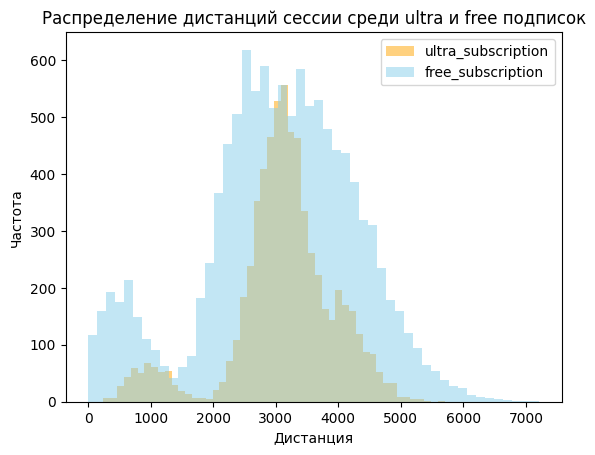

In [44]:
plt.hist(ultra_subs_type['distance'], bins=50, alpha=0.5, label='ultra_subscription', color='orange')
plt.hist(free_subs_type['distance'], bins=50, alpha=0.5, label='free_subscription', color='skyblue')
plt.xlabel('Дистанция')
plt.ylabel('Частота')
plt.title('Распределение дистанций сессии среди ultra и free подписок')
plt.legend()
plt.show()
None

Как можно заметить, распределение частот дистанций среди разных подписок имеет одинаковую форму, за исключением того, что пользователи с бесплатной подпиской имеют больший разброс(дисперсию) данных

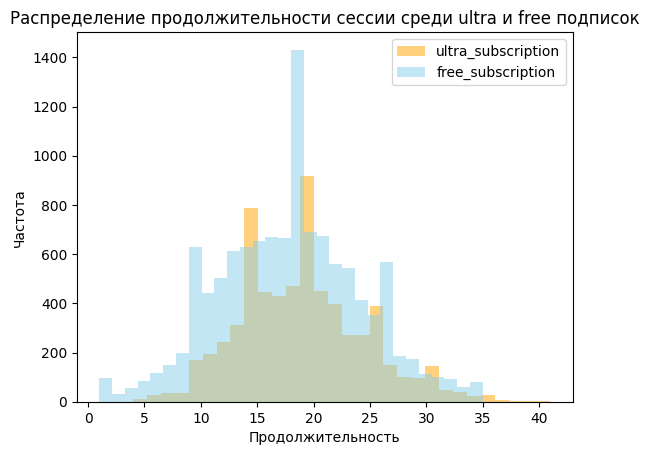

In [45]:
plt.hist(ultra_subs_type['duration'], bins=30, alpha=0.5, label='ultra_subscription', color='orange')
plt.hist(free_subs_type['duration'], bins=30, alpha=0.5, label='free_subscription', color='skyblue')
plt.xlabel('Продолжительность')
plt.ylabel('Частота')
plt.title('Распределение продолжительности сессии среди ultra и free подписок')
plt.legend()
None

Продолжительности сессии для обеих типов подписок распределены по нормальному закону, для пользователей с бесплатной подпиской наблюдается бОльшая дисперсия данных.

# Подсчет выручки

## Агрегирование датафрейма

Для подсчета выручки от каждого пользователя по каждому месяцу добавим столбцы 'month' - месяц сессии.

In [46]:
merged_data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.89,17,2021-10-09,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.02,15,2021-10-19,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.12,24,2021-11-06,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.69,16,2021-11-14,6,0,199
9,1,Кира,22,Тюмень,ultra,748.69,16,2021-11-22,6,0,199


In [47]:
month_names = {
    1: 'Январь',
    2: 'Февраль',
    3: 'Март',
    4: 'Апрель',
    5: 'Май',
    6: 'Июнь',
    7: 'Июль',
    8: 'Август',
    9: 'Сентябрь',
    10: 'Октябрь',
    11: 'Ноябрь',
    12: 'Декабрь'
}

merged_data['month'] = merged_data['date'].dt.month.map(month_names)

In [48]:
merged_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,minute_price,start_ride_price,subscription_fee,month
0,1,Кира,22,Тюмень,ultra,4409.92,26,2021-01-01,6,0,199,Январь
1,1,Кира,22,Тюмень,ultra,2617.59,16,2021-01-18,6,0,199,Январь
2,1,Кира,22,Тюмень,ultra,754.16,7,2021-04-20,6,0,199,Апрель
3,1,Кира,22,Тюмень,ultra,2694.78,19,2021-08-11,6,0,199,Август
4,1,Кира,22,Тюмень,ultra,4028.69,27,2021-08-28,6,0,199,Август


In [49]:
merged_data.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type', 'distance',
       'duration', 'date', 'minute_price', 'start_ride_price',
       'subscription_fee', 'month'],
      dtype='object')

In [50]:
group_data = pd.pivot_table(merged_data,index=['user_id', 'month'],
                                     values=['distance', 'duration','subscription_type','name'],
                                     aggfunc={'distance': np.sum,
                                              'duration': np.sum,
                                              'name': len,
                                              'subscription_type': 'min'})\
                        .rename(columns={'name': 'amount_of_session', 'distance':'total_distance', 'duration':'total_duration'})

group_data.head(20)

total_distance  total_duration  amount_of_session  \
user_id month                                                         
1       Август           6723.47              46                  2   
        Апрель            754.16               7                  1   
        Декабрь          6751.63              28                  2   
        Ноябрь           7003.50              56                  3   
        Октябрь          5809.91              32                  2   
        Январь           7027.51              42                  2   
2       Август            923.01               7                  1   
        Апрель           6164.39              40                  2   
        Декабрь          3828.25              12                  1   
        Июль             6780.73              48                  2   
        Июнь             3255.34              14                  1   
        Март            10187.73              63                  3   
        Октябрь          2824.64              19                  1   
3       Апрель           2956.65              21                  1   
        Декабрь          2593.38              13                  1   
        Июль            10919.59              67                  3   
        Май              9064.03              63                  3   
        Сентябрь         2891.01              23                  1   
        Февраль          5421.16              39                  2   
        Январь           3061.78              13                  1   

                 subscription_type  
user_id month                       
1       Август               ultra  
        Апрель               ultra  
        Декабрь              ultra  
        Ноябрь               ultra  
        Октябрь              ultra  
        Январь               ultra  
2       Август               ultra  
        Апрель               ultra  
        Декабрь              ultra  
        Июль                 ultra  
        Июнь                 ultra  
        Март                 ultra  
        Октябрь              ultra  
3       Апрель               ultra  
        Декабрь              ultra  
        Июль                 ultra  
        Май                  ultra  
        Сентябрь             ultra  
        Февраль              ultra  
        Январь               ultra

## Добавление столбца с помесячной выручкой по каждому пользователю.

In [51]:
def calculate_monthly_revenue(row):
    
    subscription_type = row['subscription_type']
    
    if subscription_type == 'ultra':
        return (6 * row['total_duration']) + 199  
    
    if subscription_type == 'free':
        return (8 * row['total_duration']) + (row['amount_of_session'] * 50)
    
group_data['monthly_revenue'] = group_data.apply(calculate_monthly_revenue, axis=1)

In [52]:
group_data

total_distance  total_duration  amount_of_session  \
user_id month                                                         
1       Август           6723.47              46                  2   
        Апрель            754.16               7                  1   
        Декабрь          6751.63              28                  2   
        Ноябрь           7003.50              56                  3   
        Октябрь          5809.91              32                  2   
...                          ...             ...                ...   
1534    Июнь             3409.47              26                  2   
        Ноябрь          13350.02              78                  4   
        Сентябрь         4928.17              23                  1   
        Февраль          2103.91              14                  1   
        Январь           4678.42              16                  1   

                 subscription_type  monthly_revenue  
user_id month                                        
1       Август               ultra              475  
        Апрель               ultra              241  
        Декабрь              ultra              367  
        Ноябрь               ultra              535  
        Октябрь              ultra              391  
...                            ...              ...  
1534    Июнь                  free              308  
        Ноябрь                free              824  
        Сентябрь              free              234  
        Февраль               free              162  
        Январь                free              178  

[11331 rows x 5 columns]

На этом этапе работы была проведено агрегирование данных по user_id и месяцу поездок и было посчитано сколько каждый пользователь совершил поездок в отельный месяц. Также было рассчитано какую выручку принес каждый пользователь в отдельные месяцы с учетом его тарифа поездок.

#  Проверка гипотез

Проверим следующие гипотезы

1.  Тратят ли пользователи с подпиской больше времени на поездки?\
2.  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

In [53]:
# group_data.groupby('subscription_type')['total_duration'].median()
group_data.pivot_table(index='subscription_type',values='total_duration', aggfunc='median')

,total_duration
subscription_type,
free,26
ultra,23


In [54]:
free_subs_sample = group_data[group_data['subscription_type'] == 'free']
free_subs_sample

total_distance  total_duration  amount_of_session  \
user_id month                                                         
700     Август           4071.65              17                  1   
        Апрель           2984.55              16                  1   
        Июль             4399.20              21                  2   
        Июнь             5927.65              29                  2   
        Март             3798.33              19                  1   
...                          ...             ...                ...   
1534    Июнь             3409.47              26                  2   
        Ноябрь          13350.02              78                  4   
        Сентябрь         4928.17              23                  1   
        Февраль          2103.91              14                  1   
        Январь           4678.42              16                  1   

                 subscription_type  monthly_revenue  
user_id month                                        
700     Август                free              186  
        Апрель                free              178  
        Июль                  free              268  
        Июнь                  free              332  
        Март                  free              202  
...                            ...              ...  
1534    Июнь                  free              308  
        Ноябрь                free              824  
        Сентябрь              free              234  
        Февраль               free              162  
        Январь                free              178  

[6798 rows x 5 columns]

In [55]:
ultra_subs_sample = group_data[group_data['subscription_type'] == 'ultra']
ultra_subs_sample

total_distance  total_duration  amount_of_session  \
user_id month                                                         
1       Август           6723.47              46                  2   
        Апрель            754.16               7                  1   
        Декабрь          6751.63              28                  2   
        Ноябрь           7003.50              56                  3   
        Октябрь          5809.91              32                  2   
...                          ...             ...                ...   
699     Декабрь          3202.89              26                  1   
        Июнь             4072.80              17                  1   
        Март             3433.52              20                  1   
        Октябрь          4707.85              16                  1   
        Сентябрь         6364.86              31                  2   

                 subscription_type  monthly_revenue  
user_id month                                        
1       Август               ultra              475  
        Апрель               ultra              241  
        Декабрь              ultra              367  
        Ноябрь               ultra              535  
        Октябрь              ultra              391  
...                            ...              ...  
699     Декабрь              ultra              355  
        Июнь                 ultra              301  
        Март                 ultra              319  
        Октябрь              ultra              295  
        Сентябрь             ultra              385  

[4533 rows x 5 columns]

## Первая гипотеза

Гипотеза H0 - средняя продолжительность поездки для пользователей с подпиской = средней продолжительности для 
пользователей без подписки
Гипотеза H1 - Средняя продолжитлеьность с подпиской выше.


Значение p равное 1 не означает, что нулевая гипотеза (H0) полностью верна; оно лишь говорит о том, что у вас нет статистических доказательств для отвержения H0 на основе имеющихся данных.

In [56]:
alpha = 0.05 # уровень значимости

results = st.ttest_ind(ultra_subs_sample['total_duration'], free_subs_sample['total_duration'] , alternative='greater')
print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value: 1.0
Не отвергаем нулевую гипотезу


Нет статистически значимой разницы. Среднее время пользователей с подпиской не отличается от пользователей без подписки.

## Вторая гипотеза

Проверим вторую гипотезу.\


H0 - среднее расстояние, которое проезжают пользователи с подпиской 3130 метров.\
H1 - среднее расстояние, которое проезжают пользователи с подпиской больше 3130.

In [57]:
alpha = 0.05 # уровень значимости

interested_value = 3130

results = st.ttest_1samp(ultra_subs_sample['total_distance'], interested_value, alternative='greater')
print(f'p-value: {results.pvalue}')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 



p-value: 3.883692127110973e-278
Отвергаем нулевую гипотезу


Среднее расстояние, которое проезжают пользователи не равно 3130. И, соответсвенно, среднее расстояние среди пользователей с подпиской в среднем выше, чем 3130 метров, и это значит, что пользователь с подпиской также изнашивают самокаты. Большую роль здесь может играть тот факт, что с подпиской стоимость минуты меньше, поэтому пользователи дольше катаются и проезжают большое расстояние.

## Третья гипотеза

Проверим третью гипотезу.\
Н0 - средняя выручка по месяцам у пользователей с подпиской и без равны.\
H1 - средняя выручка по месяцам у пользователей с подпиской выше, чем у пользователей без подписки.


In [58]:
free_subs_sample['monthly_revenue'].mean()

328.6413651073845

In [59]:
ultra_subs_sample['monthly_revenue'].mean()

362.7921906022502

In [60]:
alpha = 0.05

results = st.ttest_ind(ultra_subs_sample['monthly_revenue'], free_subs_sample['monthly_revenue'], alternative='greater')

print(f"p-value{results.pvalue}")


if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-value1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу о том, что средние выручки равны. И исходя из одностороннего теста вправо, можно сказать, что средняя вырчка пользователей с подпиской выше. И эти пользователи выгоднее для компании.

## Четвертая гипотеза

Для гипотезы необходимо провести односторонний тест влево, т.е. H0 - количество обращений до и после ремонта сервера равны, H1 - количество обращений после ремонта меньше, чем до.

# Распределения

##


In [61]:
from scipy.stats import binom

# Заданные параметры
p = 0.1 # вероятность успеха
desired_prob = 0.05 
min_success = 100

N = 1
prob = 0

while prob < desired_prob:
    prob = 1 - binom.cdf(min_success - 1, N, p)
    N += 1

print(f"Минимальное количество промокодов N: {N}")
print(f"Вероятность {prob}")

Минимальное количество промокодов N: 851
Вероятность 0.05118157806052659


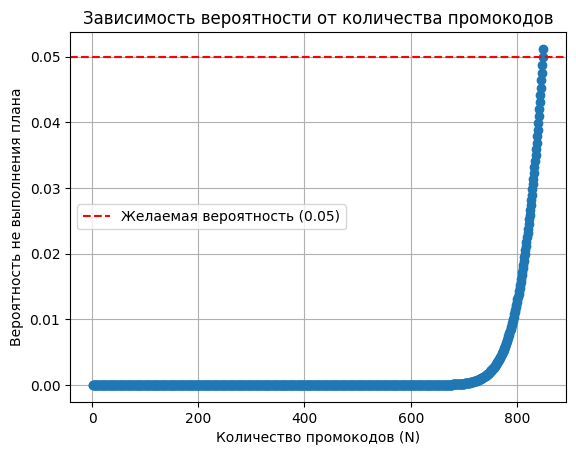

In [62]:
p = 0.1
desired_prob = 0.05
min_success = 100

N_values = []
prob_values = []

N = 1
prob = 0

while prob < desired_prob:
    prob = 1 - binom.cdf(min_success - 1, N, p)
    N_values.append(N)
    prob_values.append(prob)
    N += 1
    

plt.plot(N_values, prob_values, marker='o', linestyle='-')
plt.xlabel('Количество промокодов (N)')
plt.ylabel('Вероятность не выполнения плана')
plt.title('Зависимость вероятности от количества промокодов')
plt.grid(True)
plt.axhline(desired_prob, color='red', linestyle='--', label=f'Желаемая вероятность ({desired_prob})')
plt.legend()
plt.show()

Нужно разослать минимум 851 промокод для того, чтобы вероятность не выполнить план была примерно 5 %, при условии того, что прописку продлевает 10%  пользователей после бесплатного пробного периода.

## 

In [63]:
n = 1000000  # количество новых посетителей
p = 0.4  # вероятность завести аккаунт
desired_users = 399500

# Рассчитываем параметры нормального распределения
mu = n * p  # математическое ожидание
sigma = sqrt(n * p * (1 - p))  # стандартное отклонение

# Задаем нормальное распределение
distr = st.norm(mu, sigma)

# Находим вероятность, что появится меньше 339.5 тысяч новых аккаунтов
result = distr.cdf(desired_users)  
print("Вероятность того, что не более 399,5 тыс. пользователей откроют уведомление:", result)

Вероятность того, что не более 399,5 тыс. пользователей откроют уведомление: 0.15371708296369768


При условии того, что будет разослано 1 млн push уведомлений, вероятность того, что пользователи откроют не более 399.5 тыс уведомлений равна 15.3%

# Общий вывод


В рамках исследования были изучены данные популярного сервиса аренды самокатов GoFast.Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.\

Сервисом можно пользоваться:
без подписки\
абонентская плата отсутствует;\
стоимость одной минуты поездки — 8 рублей;\
стоимость старта (начала поездки) — 50 рублей;\

с подпиской Ultra\
абонентская плата — 199 рублей в месяц;\
стоимость одной минуты поездки — 6 рублей;\
стоимость старта — бесплатно.\

**Описание данных**\
В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — users_go.csv

user_id - уникальный идентификатор пользователя
name - имя пользователя
age - возраст
city - город
subscription_type тип подписки (free, ultra)\

Поездки — rides_go.csv\

user_id - уникальный идентификатор пользователя distance - расстояние, которое пользователь проехал в текущей сессии (в метрах) duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
date - дата совершения поездки\

Подписки — subscriptions_go.csv
subscription_type - тип подписки
minute_price - стоимость одной минуты поездки по данной подписке
start_ride_price - стоимость начала поездки
subscription_fee - стоимость ежемесячного платежа\

Всего датасет users_go содержит данные о 1534 пользователях из разных городов. Датасет rides_go содержит в себе 18068 записей о поездках пользователей из датасета users_go. Датасет subscription_go содержит данные о тарифах поездок с подпиской и без.

На этапе предобработки данных были обработаны дубликаты в данных, изучены датасеты на предмет пропусков данных, которых не оказалось ни в одном датасете. Также были построены гистограмы для числовых признаков, которые показали, что время и дистанции поездок распределены близко к нормальному закону.

Исследовательский анализ показал:\
1. Самый популярный город - Пятигорск, наименее - Москва.\
2. Пользователей без подписки в процентном соотношении больше(54.4%), чем пользователей с подпиской (45.6%)\
3. Средний возраст пользователя - 25 лет, минимальный - 12, а максимальный - 43 года.\
4. Средняя продолжительность поездки среди пользователей 17.6 минут. При это присутсвуют долгие сессии от 30 минут и выше, так и слишком короткие сессии продолжительностью меньше минуты.\
5. Средняя дистанция поездки - 3070 метров. При этом существуют как слишком "длинные" поездки до 7000 метров, так и слишком короткие длиною меньше 1000 метров.

Также в ходе работы были объеденены с помощью метода merge все три датасате по ключу user_id , а также после этого были сформированы отдельные выборки для пользователей с подпиской и без.

Анализ распределений отдельных выборок показал:\
1. Распределение частот дистанций среди разных подписок имеет одинаковую форму, за исключением того, что пользователи с бесплатной подпиской имеют больший разброс(дисперсию) данных.
2. Продолжительности сессии для обеих типов подписок распределены по нормальному закону, для пользователей с бесплатной подпиской наблюдается бОльшая дисперсия данных.

На следующем этапе работы была проведено агрегирование данных по user_id и месяцу поездок и было посчитано сколько каждый пользователь совершил поездок в отельный месяц. Также было рассчитано какую выручку принес каждый пользователь в отдельные месяцы с учетом его тарифа поездок.

На этапе проверки гипотез были изучены следующие статистические закономерности.

1.  Тратят ли пользователи с подпиской больше времени на поездки?\
2.  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 

4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для первой гипотезы была проверена односторонняя правая гипотеза. **Вывод** - Нет статистически значимой разницы. Среднее время пользователей с подпиской не отличается от пользователей без подписки.


Для второй гипотезы была проверена односторонняя правая гипотеза. **Вывод**- Среднее расстояние, которое проезжают пользователи не равно 3130. И, соответсвенно, среднее расстояние среди пользователей с подпиской в среднем выше, чем 3130 метров, и это значит, что пользователь с подпиской также изнашивают самокаты. Большую роль здесь может играть тот факт, что с подпиской стоимость минуты меньше, поэтому пользователи дольше катаются и проезжают большое расстояние.

Для третьей гипотезы была проведена односторонняя правая гипотеза. **Вывод** - Отвергаем нулевую гипотезу о том, что средние выручки равны. И исходя из одностороннего теста вправо, можно сказать, что средняя вырчка пользователей с подпиской выше. И эти пользователи выгоднее для компании.

Для четвертой гипотезы необходимо провести односторонний тест влево, т.е. H0 - количество обращений до и после ремонта сервера равны, H1 - количество обращений после ремонта меньше, чем до.

Также в ходе работы были изучены распредления и получены следующие ответы для отдела маркетинга:
1. Нужно разослать минимум 851 промокод для того, чтобы вероятность не выполнить план была примерно 5 %, при условии того, что прописку продлевает 10% пользователей после бесплатного пробного периода.
2. При условии того, что будет разослано 1 млн push уведомлений, вероятность того, что пользователи откроют не более 399.5 тыс уведомлений равна 15.3%

Вывод: сервису выгоднее увеличивать количество пользователей с подпиской так как они приносят большую выручку.